<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/PCA_Unknown_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse
from sklearn.covariance import EllipticEnvelope
import matplotlib.transforms as transforms

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
Auto_5_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto5_PUF_120k_blank_filtered.csv')
Auto_4_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto4_PUF_120k_blank_filtered.csv')
Auto_3_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto3_PUF_120k_blank_filtered.csv')
Auto_2_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto2_PUF_120k_blank_filtered.csv')
Auto_1_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto1_PUF_120k_blank_filtered.csv')

Auto_5_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto5_PF_120k_blank_filtered.csv')
Auto_4_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto4_PF_120k_blank_filtered.csv')
Auto_3_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto3_PF_120k_blank_filtered.csv')
Auto_2_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto2_PF_120k_blank_filtered.csv')
Auto_1_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto1_PF_120k_blank_filtered.csv')

In [3]:
def extract_elements(df):
    def extract_elements_from_formula(formula):
        elements = {'C': 0, 'O': 0, 'N': 0, 'S': 0, 'Si': 0, 'Cl': 0, 'F': 0, 'Br': 0, 'I': 0, 'B': 0, 'P': 0}

        current_element = ''
        current_count = ''

        for char in formula:
            if char.isalpha():
                if current_element:
                    if current_element in elements:
                        elements[current_element] += int(current_count) if current_count else 1
                current_element = char
                current_count = ''
            elif char.isdigit():
                current_count += char

        if current_element in elements:
            elements[current_element] += int(current_count) if current_count else 1

        return pd.Series(elements)

    element_counts = df['Formula (mol ion)'].apply(extract_elements_from_formula)

    df = pd.concat([df, element_counts], axis=1)
    return df

In [4]:
Auto_5_gp_df = extract_elements(Auto_5_gp_df)
Auto_4_gp_df = extract_elements(Auto_4_gp_df)
Auto_3_gp_df = extract_elements(Auto_3_gp_df)
Auto_2_gp_df = extract_elements(Auto_2_gp_df)
Auto_1_gp_df = extract_elements(Auto_1_gp_df)

Auto_5_pm_df = extract_elements(Auto_5_pm_df)
Auto_4_pm_df = extract_elements(Auto_4_pm_df)
Auto_3_pm_df = extract_elements(Auto_3_pm_df)
Auto_2_pm_df = extract_elements(Auto_2_pm_df)
Auto_1_pm_df = extract_elements(Auto_1_pm_df)

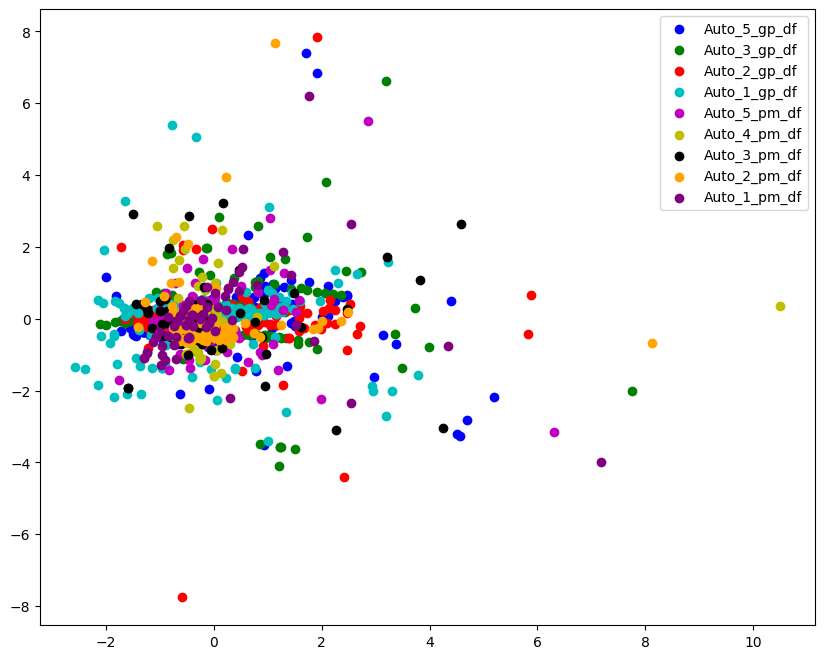

In [5]:
columns_of_interest = ['Area Ratio', 'O', 'C', 'N', 'S', 'Cl', 'Br', 'F', 'Si', 'B', 'I', 'P' ]

dfs = {
    'Auto_5_gp_df': Auto_5_gp_df,
    'Auto_3_gp_df': Auto_3_gp_df,
    'Auto_2_gp_df': Auto_2_gp_df,
    'Auto_1_gp_df': Auto_1_gp_df,
    'Auto_5_pm_df': Auto_5_pm_df,
    'Auto_4_pm_df': Auto_4_pm_df,
    'Auto_3_pm_df': Auto_3_pm_df,
    'Auto_2_pm_df': Auto_2_pm_df,
    'Auto_1_pm_df': Auto_1_pm_df
}

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

# Your existing code for creating subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through dataframes and plot PCA results along with confidence ellipses
for i, (name, df) in enumerate(dfs.items()):
    df_subset = df[columns_of_interest]
    scaler = StandardScaler()
    df_standardized = scaler.fit_transform(df_subset)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_standardized)

    ax.scatter(pca_result[:, 0], pca_result[:, 1], color=colors[i], label=name)

    # Calculate confidence ellipse parameters
    x = pca_result[:, 0]
    y = pca_result[:, 1]
    center = np.mean(x), np.mean(y)
    #confidence_ellipse(x, y, ax, edgecolor=colors[i], label=f'{name} Ellipse', center=center, rotate=True)

# Add legend
ax.legend()

# Show the plot
plt.show()

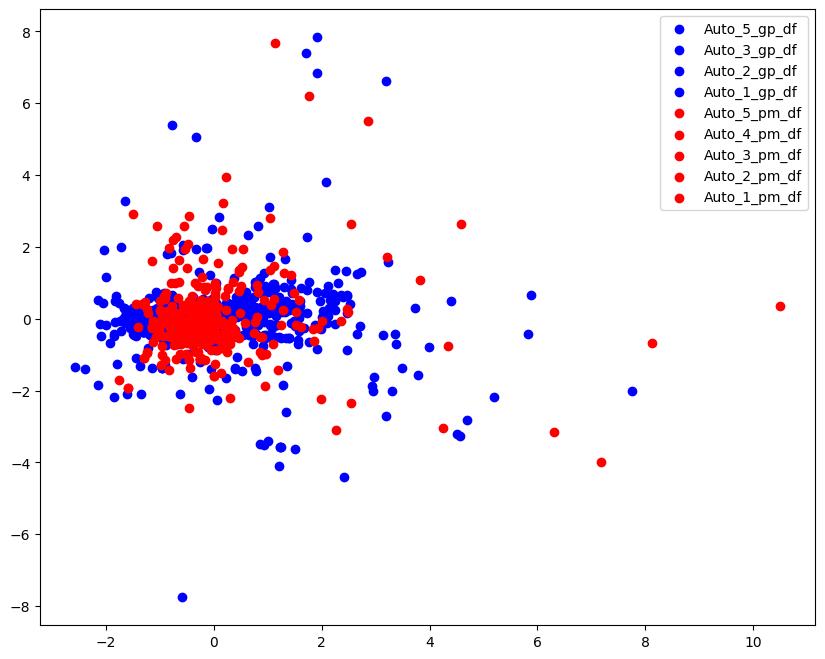

In [6]:
# Define colors for 'gp' and 'pm'
gp_color = 'b'
pm_color = 'r'

# Your existing code for creating subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through dataframes and plot PCA results along with confidence ellipses
for name, df in dfs.items():
    df_subset = df[columns_of_interest]
    scaler = StandardScaler()
    df_standardized = scaler.fit_transform(df_subset)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_standardized)

    # Check if the dataframe name contains 'gp' or 'pm' and assign colors accordingly
    color = gp_color if 'gp' in name else pm_color

    ax.scatter(pca_result[:, 0], pca_result[:, 1], color=color, label=name)

# Add legend
ax.legend()

# Show the plot
plt.show()

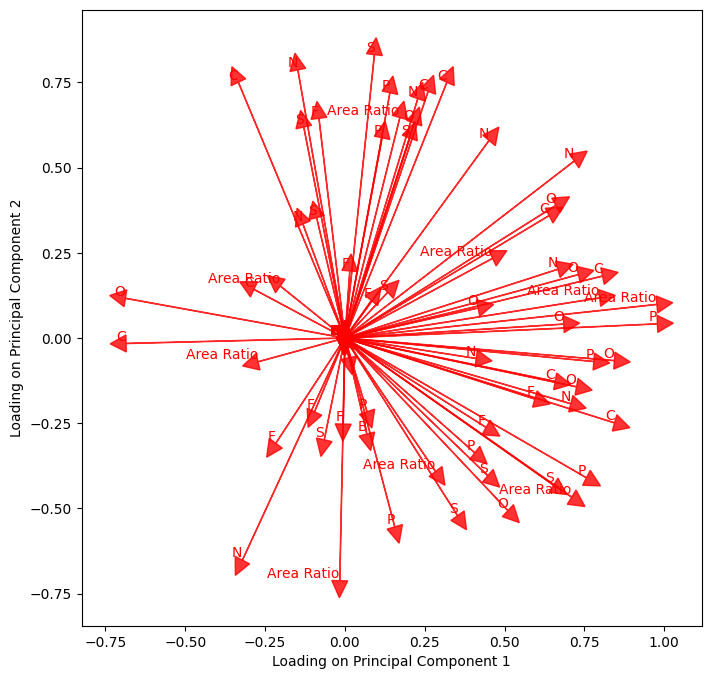

In [7]:
# Create a subplot for loadings
fig, ax = plt.subplots(figsize=(8, 8))

# Plot PCA loadings for the first two components
for name, df in dfs.items():
    df_subset = df[columns_of_interest]
    scaler = StandardScaler()
    df_standardized = scaler.fit_transform(df_subset)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_standardized)

    # Plot PCA loadings
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    for feature, loading in zip(columns_of_interest, loadings):
        ax.arrow(0, 0, loading[0], loading[1], color='r', alpha=0.8, head_width=0.05, head_length=0.05)
        ax.text(loading[0], loading[1], feature, color='r', ha='right', va='bottom')

# Set labels
ax.set_xlabel('Loading on Principal Component 1')
ax.set_ylabel('Loading on Principal Component 2')

# Show the plot
plt.show()

<ipython-input-8-fbabf28060bd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-8-fbabf28060bd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-8-fbabf28060bd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


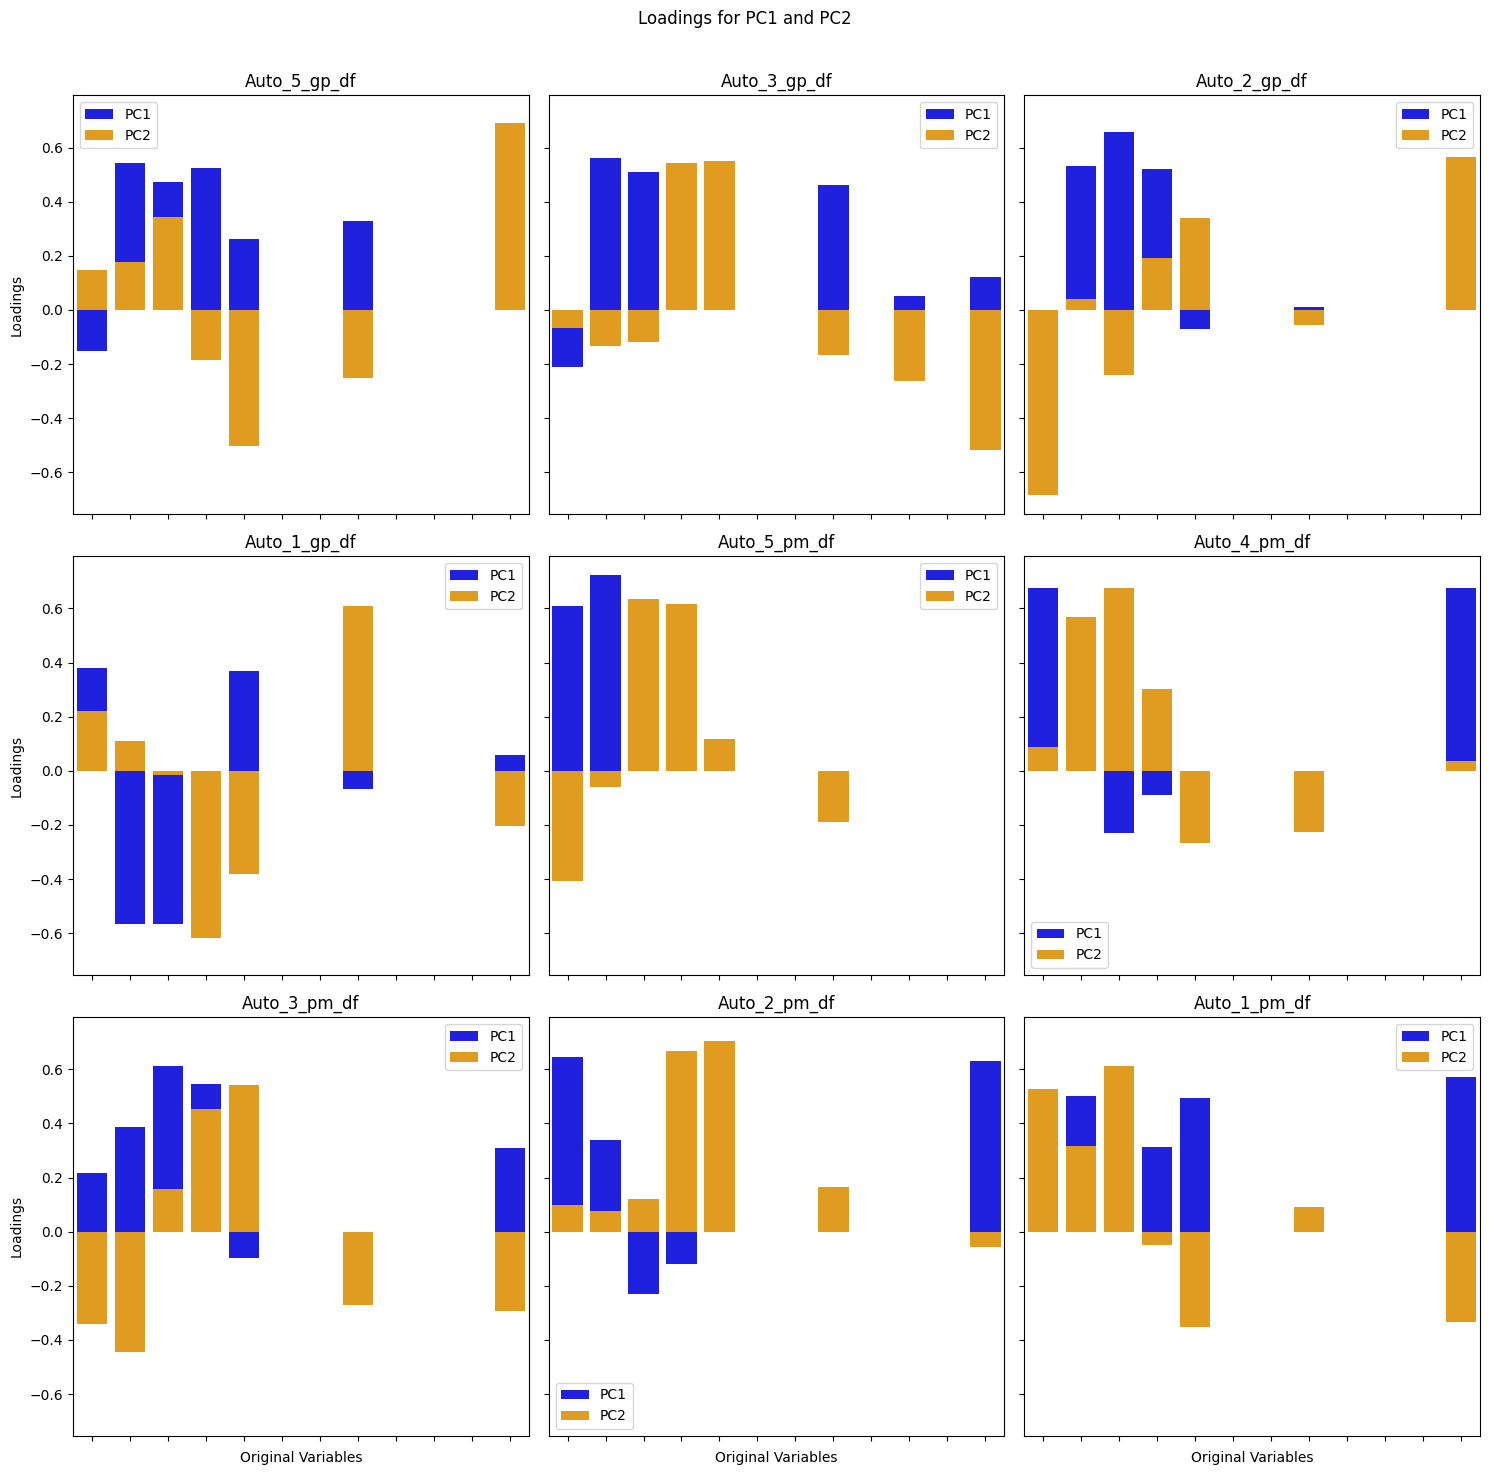

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle('Loadings for PC1 and PC2')

# Flatten axes for easier indexing
axes = axes.flatten()

for i, (name, df) in enumerate(dfs.items()):
    # Standardize the data
    scaler = StandardScaler()
    df_standardized = scaler.fit_transform(df[columns_of_interest])

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_standardized)

    # Create a DataFrame for loadings
    loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])], index=columns_of_interest)

    # Plot the loadings for PC1 and PC2
    sns.barplot(x=loadings.index, y=loadings['PC1'], color='blue', label='PC1', ax=axes[i])
    sns.barplot(x=loadings.index, y=loadings['PC2'], color='orange', label='PC2', ax=axes[i])

    # Customize the plot
    axes[i].set_title(name)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_xlabel('Original Variables')
    axes[i].set_ylabel('Loadings')
    axes[i].legend()

# Adjust layout for subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()

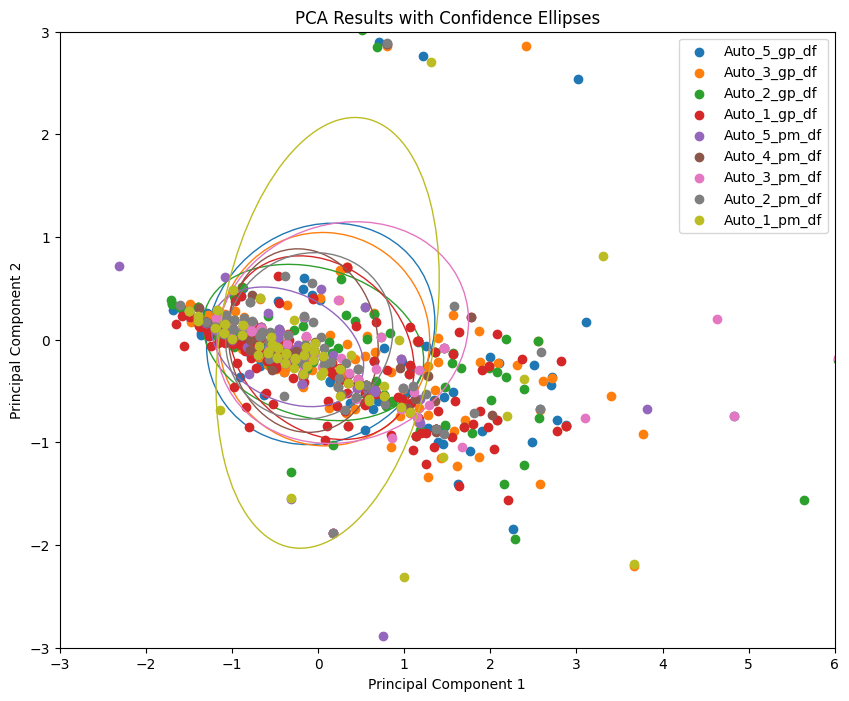

In [9]:
combined_df = pd.concat(dfs.values(), ignore_index=True)

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(combined_df[columns_of_interest])

# Perform PCA on the complete data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standardized)

# Create a scatter plot for PCA results with each dataframe having a different color
plt.figure(figsize=(10, 8))
for i, (name, df) in enumerate(dfs.items()):
    df_subset = df[columns_of_interest]
    df_standardized_subset = scaler.transform(df_subset)
    pca_result_subset = pca.transform(df_standardized_subset)

    # Assign a unique color to each dataframe
    color = plt.cm.tab10(i / len(dfs))

    plt.scatter(pca_result_subset[:, 0], pca_result_subset[:, 1], label=name, color=color)

    # Calculate mean, covariance matrix, and eigenvalues/eigenvectors for the subset
    mean_subset = np.mean(pca_result_subset, axis=0)
    cov_matrix_subset = np.cov(pca_result_subset, rowvar=False)

    # Plot confidence ellipse for the subset
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix_subset)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

    ellipse = Ellipse(xy=mean_subset, width=np.sqrt(eigenvalues[0]) * 2, height=np.sqrt(eigenvalues[1]) * 2,
                      angle=angle, edgecolor=color, facecolor='none', label='_nolegend_')
    plt.gca().add_patch(ellipse)

# Set labels and legend
plt.xlim([-3, 6])
plt.ylim([-3, 3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results with Confidence Ellipses')
plt.legend()

# Show the plot
plt.show()

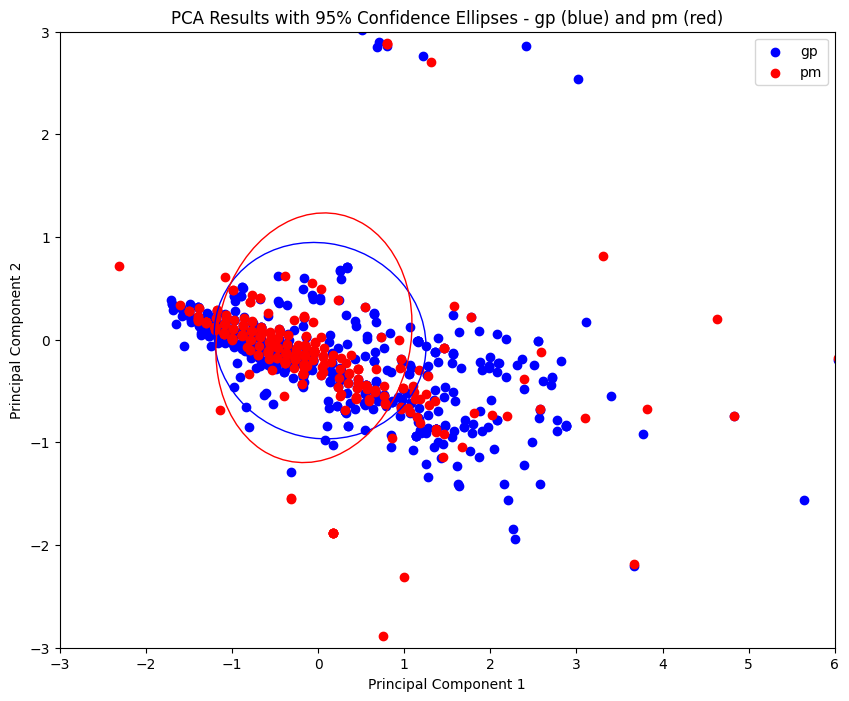

In [10]:
combined_df = pd.concat(dfs.values(), ignore_index=True)

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(combined_df[columns_of_interest])

# Perform PCA on the complete data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standardized)

# Separate data into 'gp' and 'pm' subsets
gp_data = np.concatenate([pca.transform(scaler.transform(df[columns_of_interest])) for name, df in dfs.items() if 'gp' in name], axis=0)
pm_data = np.concatenate([pca.transform(scaler.transform(df[columns_of_interest])) for name, df in dfs.items() if 'pm' in name], axis=0)

# Calculate mean, covariance matrix, and eigenvalues/eigenvectors for 'gp' subset
mean_gp = np.mean(gp_data, axis=0)
cov_matrix_gp = np.cov(gp_data, rowvar=False)
eigenvalues_gp, eigenvectors_gp = np.linalg.eigh(cov_matrix_gp)
angle_gp = np.degrees(np.arctan2(*eigenvectors_gp[:, 0][::-1]))

# Calculate mean, covariance matrix, and eigenvalues/eigenvectors for 'pm' subset
mean_pm = np.mean(pm_data, axis=0)
cov_matrix_pm = np.cov(pm_data, rowvar=False)
eigenvalues_pm, eigenvectors_pm = np.linalg.eigh(cov_matrix_pm)
angle_pm = np.degrees(np.arctan2(*eigenvectors_pm[:, 0][::-1]))

# Plot scatter for 'gp' and 'pm'
plt.figure(figsize=(10, 8))
plt.scatter(gp_data[:, 0], gp_data[:, 1], label='gp', color='blue')
plt.scatter(pm_data[:, 0], pm_data[:, 1], label='pm', color='red')

# Plot confidence ellipse for 'gp'
ellipse_gp = Ellipse(xy=mean_gp, width=np.sqrt(eigenvalues_gp[0]) * 2, height=np.sqrt(eigenvalues_gp[1]) * 2,
                      angle=angle_gp, edgecolor='blue', facecolor='none', label='_nolegend_')
plt.gca().add_patch(ellipse_gp)

# Plot confidence ellipse for 'pm'
ellipse_pm = Ellipse(xy=mean_pm, width=np.sqrt(eigenvalues_pm[0]) * 2, height=np.sqrt(eigenvalues_pm[1]) * 2,
                      angle=angle_pm, edgecolor='red', facecolor='none', label='_nolegend_')
plt.gca().add_patch(ellipse_pm)

# Set labels and legend
plt.xlim([-3, 6])
plt.ylim([-3, 3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results with 95% Confidence Ellipses - gp (blue) and pm (red)')
plt.legend()

# Show the plot
plt.show()

<ipython-input-11-00da4ac3d497>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


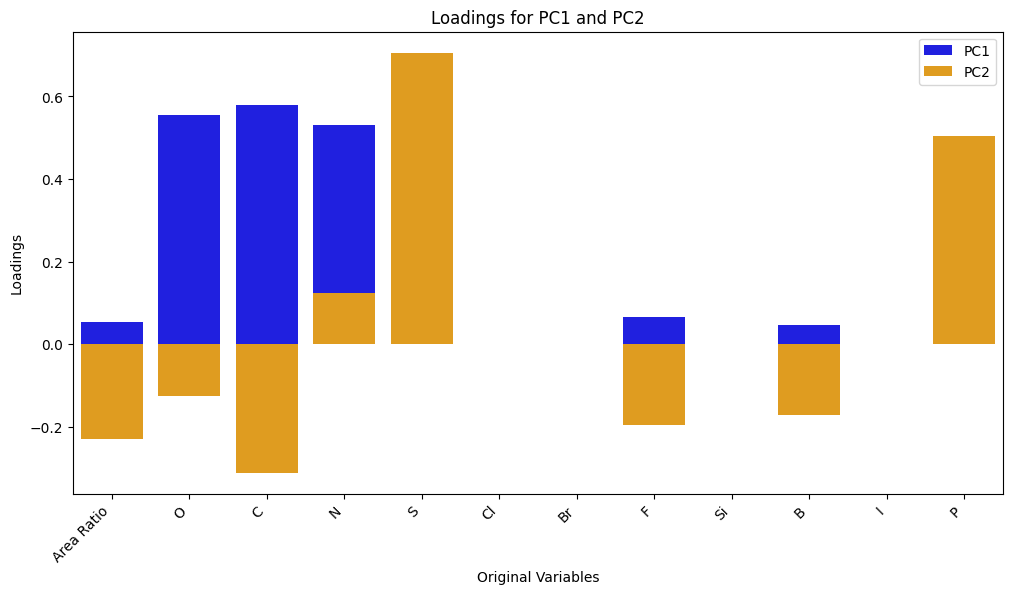

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

# Combine all dataframes into one for PCA analysis
combined_df = pd.concat(dfs.values(), ignore_index=True)

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(combined_df[columns_of_interest])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standardized)

# Create a DataFrame for loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])], index=columns_of_interest)

# Plot the loadings for PC1 and PC2
sns.barplot(x=loadings.index, y=loadings['PC1'], color='blue', label='PC1', ax=ax)
sns.barplot(x=loadings.index, y=loadings['PC2'], color='orange', label='PC2', ax=ax)

# Customize the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('Original Variables')
ax.set_ylabel('Loadings')
ax.set_title('Loadings for PC1 and PC2')
ax.legend()

# Show the plot
plt.show()